## Customer segmentation group-project Dec 2022: Clustering

The goal was to find meaningful clusters to optimize marketing out of a dataset with 8500 customers showing 18 features related to their credit card transactions.

### Libraries needed

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sns


from sklearn import preprocessing 
from sklearn.preprocessing import PowerTransformer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans



import warnings
warnings.filterwarnings('ignore')




In [9]:
df = pd.read_csv('/Users/mjs/Desktop/Dev/Segmentation_Banking_2022/Credit-Card-Segmentation/data/labelled_transactions2.csv')
df_raw = df.drop(columns = ['Outlier_CBLOF', 'Outlier_IF','KMeans_label',
                               'labels_hierarchical_3c','labels_hierarchical_9c','PowTrUMAT',
                              'PCA1','PCA2','PCA3'])

#### Hierarchical clustering - not used in the presentation, because it is not inuitively understandable

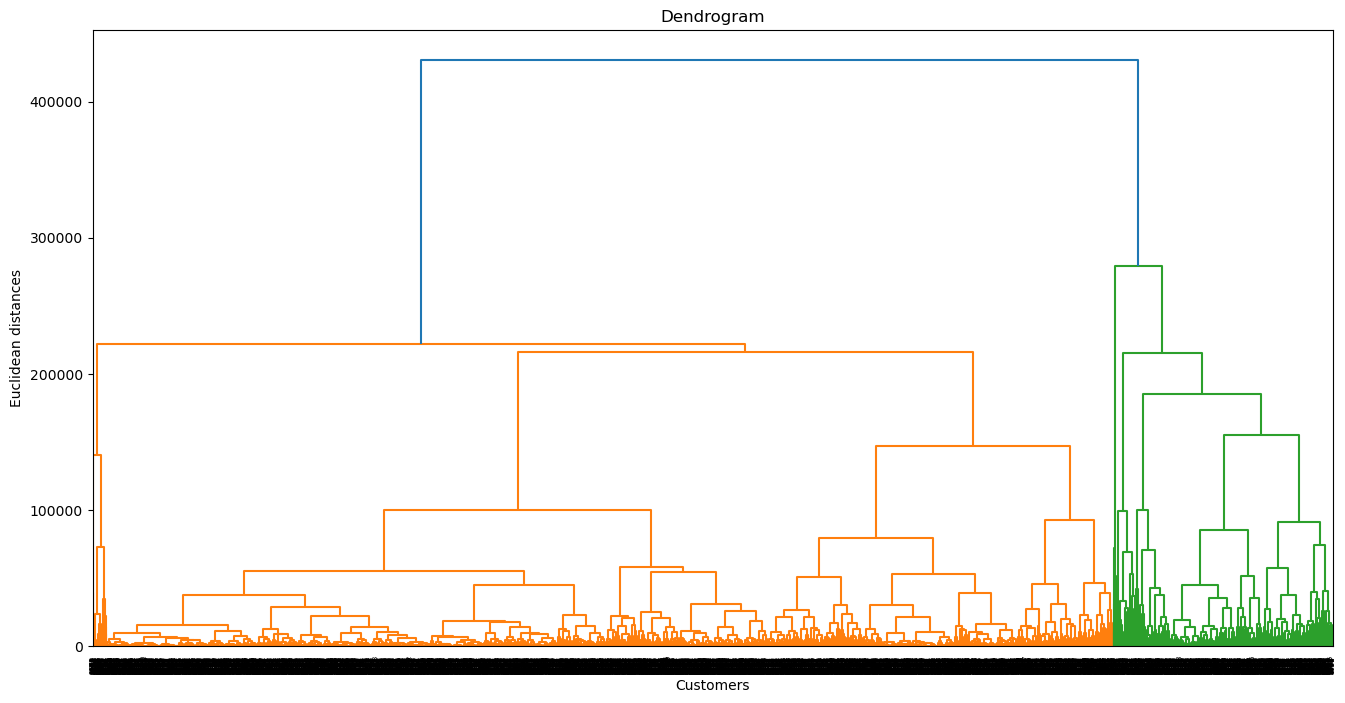

In [10]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df_raw, method  = "ward", optimal_ordering = False))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Add the clusters according to hierarchial clustering, with 3 and 9 clusters, see diagram above


clustering_model3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model3.fit(df_no_out)
labels_hierarchical_3c = clustering_model3.labels_

clustering_model9 = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
clustering_model9.fit(df_no_out)
labels_hierarchical_9c = clustering_model9.labels_

#Code to add the cluster to the df

df_no_out['labels_hierarchical_3c'] = labels_hierarchical_3c
df_no_out['labels_hierarchical_9c'] = labels_hierarchical_9c

#df_no_out.to_csv('/Users/mjs/Desktop/Dev/hierarchical_labels.csv')

### Scatterplot of feature combinations


In [20]:
# There are 17 * 17 (289) plots, a lot to go through and there are also duplicates, just x & y axis changed
col = list(df_raw.columns)


for i, col1 in enumerate (col):
    for j, col2 in enumerate (col):
        sns.scatterplot(x=col1,
            
                y=col2,
                data=df_raw, 
                hue=df['labels_hierarchical_9c'],
               palette = "bright").set_title(f'Scatter {col1} and {col2}')
        plt.show()
        plt.close()

17

### TSNE as another dimensionalty reduction method to find clusters

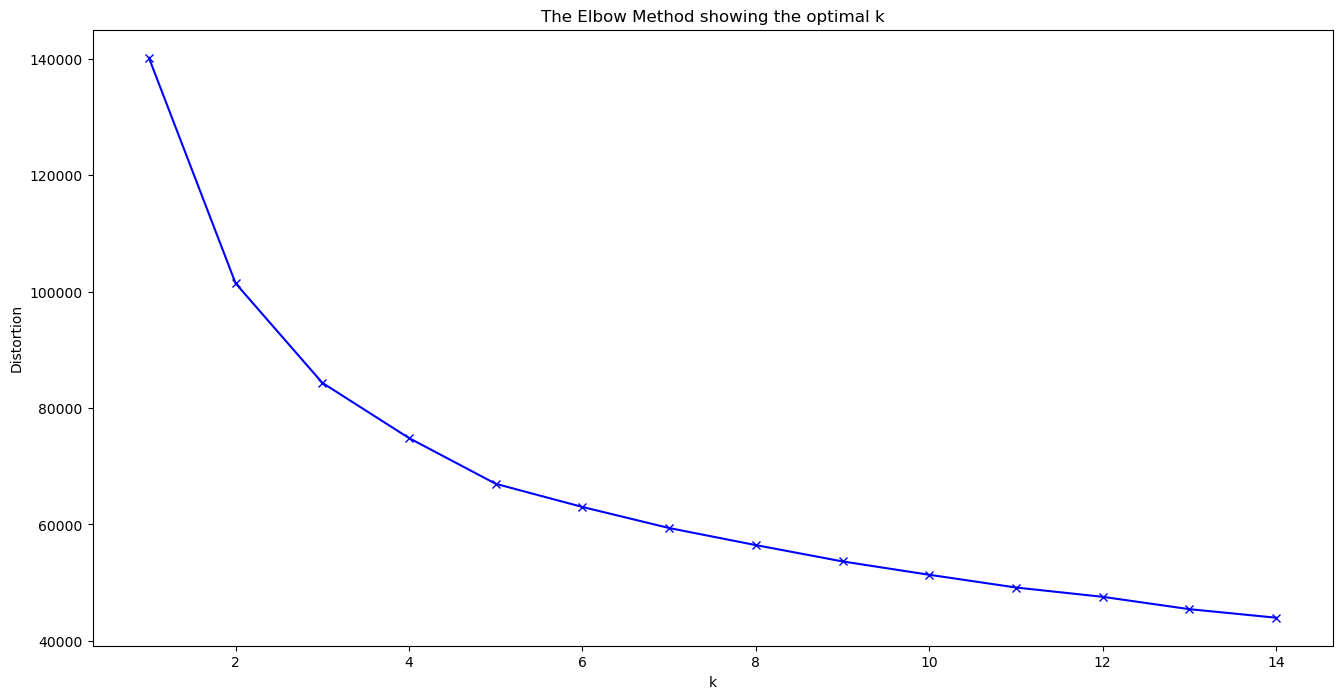

In [28]:
# UMAP by JvK achieved better results
# Remove the outliers before applying TSNE

df_noOutl = df[df['Outlier_CBLOF']==0]
df_noOutl = df_noOutl.drop(columns = ['Outlier_CBLOF', 'Outlier_IF','KMeans_label',
                               'labels_hierarchical_3c','labels_hierarchical_9c','PowTrUMAT',
                              'PCA1','PCA2','PCA3'])


#Use a scaler/transformer to achieve better results
pt = PowerTransformer()
df_noOutl = pt.fit_transform(df_noOutl)

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 15)
    kmeanModel.fit(df_noOutl)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
#Choose different KMeans according to the elbow graph above
kmeans_3 = KMeans(n_clusters=3, n_init = 15)
labels_3 = kmeans_3.fit_predict(df_noOutl)

kmeans_5 = KMeans(n_clusters=5, n_init = 15)
labels_5 = kmeans_5.fit_predict(df_noOutl)

kmeans_8 = KMeans(n_clusters=8, n_init = 15)
labels_8 = kmeans_8.fit_predict(df_noOutl)

kmeans_12 = KMeans(n_clusters=12, n_init = 15)
labels_12 = kmeans_12.fit_predict(df_noOutl)

df_dim_red = pd.DataFrame()
df_dim_red['labels_3'] = labels_3
df_dim_red['labels_5'] = labels_5
df_dim_red['labels_8'] = labels_8
df_dim_red['labels_12'] = labels_12

In [37]:
tsne = TSNE(n_components=2, perplexity=90)   
x_1 = tsne.fit_transform(df_noOutl)

df_dim_red['tsne_1_0'] = x_1[:,0]
df_dim_red['tsne_1_1'] = x_1[:,1]



tsne_2 = TSNE(n_components=2, perplexity=250)   
x_2 = tsne_2.fit_transform(df_noOutl)

df_dim_red['tsne_2_0'] = x_2[:,0]
df_dim_red['tsne_2_1'] = x_2[:,1]

In [38]:
df_dim_red

,labels_3,labels_5,labels_8,labels_12,tsne_1_0,tsne_1_1,tsne_2_0,tsne_2_1
0,0,2,1,2,0.103649,-40.704342,27.062162,-28.206087
1,0,2,1,2,-1.357334,-35.778347,27.512953,-25.938620
2,2,1,7,11,-33.316387,-40.287216,-16.733757,-13.737815
3,1,3,3,10,16.968266,2.238256,7.315216,4.160254
4,2,1,7,7,-23.235584,5.373353,-25.522749,-7.890371
...,...,...,...,...,...,...,...,...
8240,2,1,0,9,-60.834862,11.831058,-42.926250,-2.297970
8241,0,2,1,2,44.435917,-34.784924,28.608217,-13.979695
8242,2,1,7,11,-33.806793,-31.150627,-21.896233,-13.073062
8243,1,4,2,1,-12.285444,20.945265,-18.514645,14.375915


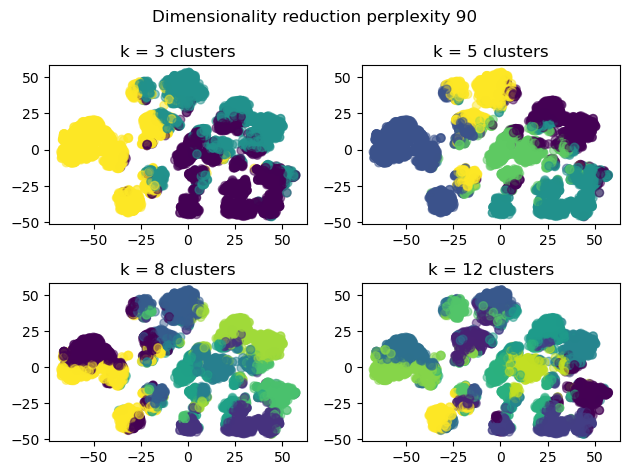

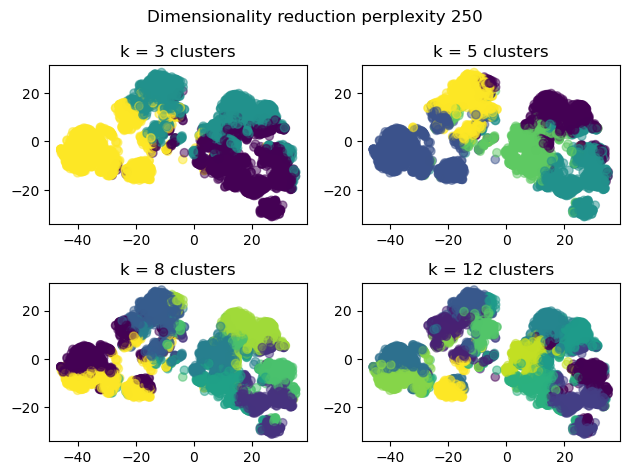

In [42]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(data=df_dim_red, x='tsne_1_0',y='tsne_1_1', c = 'labels_3', alpha=0.5)
axs[0, 0].set_title('k = 3 clusters')
axs[0, 1].scatter(data=df_dim_red, x='tsne_1_0',y='tsne_1_1', c = 'labels_5' ,alpha=0.5)
axs[0, 1].set_title('k = 5 clusters')
axs[1, 0].scatter(data=df_dim_red, x='tsne_1_0',y='tsne_1_1', c = 'labels_8' ,alpha=0.5)
axs[1, 0].set_title('k = 8 clusters')
axs[1, 1].scatter(data=df_dim_red, x='tsne_1_0',y='tsne_1_1', c = 'labels_12' ,alpha=0.5)
axs[1, 1].set_title('k = 12 clusters')
fig.suptitle('Dimensionality reduction perplexity 90')
fig.tight_layout()
plt.show()
plt.close()


fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(data=df_dim_red, x='tsne_2_0',y='tsne_2_1', c = 'labels_3', alpha=0.5)
axs[0, 0].set_title('k = 3 clusters')
axs[0, 1].scatter(data=df_dim_red, x='tsne_2_0',y='tsne_2_1', c = 'labels_5' ,alpha=0.5)
axs[0, 1].set_title('k = 5 clusters')
axs[1, 0].scatter(data=df_dim_red, x='tsne_2_0',y='tsne_2_1', c = 'labels_8' ,alpha=0.5)
axs[1, 0].set_title('k = 8 clusters')
axs[1, 1].scatter(data=df_dim_red, x='tsne_2_0',y='tsne_2_1', c = 'labels_12' ,alpha=0.5)
axs[1, 1].set_title('k = 12 clusters')
fig.suptitle('Dimensionality reduction perplexity 250')
fig.tight_layout()
plt.show()
plt.close()

### Individuals features for k=8 by UMAP

In [43]:
#Remove all except the UMAP columns

df_plot_cluster = df.drop(columns = ['Outlier_CBLOF', 'Outlier_IF','KMeans_label',
                               'labels_hierarchical_3c','labels_hierarchical_9c',
                              'PCA1','PCA2','PCA3'])


def outside_limit(df, label_col, label, sensitivity):
    feature_list = df.columns[:-1]

    
    plot_list = []
    mean_overall_list = []
    mean_cluster_list = []
  
    for i,varname in enumerate(feature_list):
    
        #     get overall mean for a variable, set lower and upper limit
        mean_overall = df[varname].mean()
        lower_limit = mean_overall - (mean_overall*sensitivity)
        upper_limit = mean_overall + (mean_overall*sensitivity)

        #     get cluster mean for a variable
        cluster_filter = df[label_col]==label
        pd_cluster = df[cluster_filter]
        mean_cluster = pd_cluster[varname].mean()
    
        #     create filter to display graph with 0.5 deviation from the mean
        if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
            plot_list.append(varname)
            mean_overall_std = mean_overall/mean_overall
            mean_cluster_std = mean_cluster/mean_overall
            mean_overall_list.append(mean_overall_std)
            mean_cluster_list.append(mean_cluster_std)
        
        
        mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
  
    mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)
    
    return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
    
    mean_df = outside_limit(df = df, label_col = label_col, label = label, sensitivity = sensitivity)
    mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)

  
    if len(mean_df.index) != 0:
        sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                    alpha=0.75, dodge=True, ax=ax)
        


    for i,p in enumerate(ax.patches):
        ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
    

    
    ax.set_title('Unique Characteristics of Cluster ' + str(label))
    ax.set_xlabel('Standardized Mean')
    ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
    ax= ax.ravel()
  
    label = np.arange(n_clusters)
    for i in label:
        plot_barchart_all_unique_features(df = df, label_col =label_col, label=i, ax=ax[i], sensitivity=sensitivity)
        ax[i].xaxis.set_tick_params(labelbottom=True)
 
    plt.tight_layout()
    display(fig)

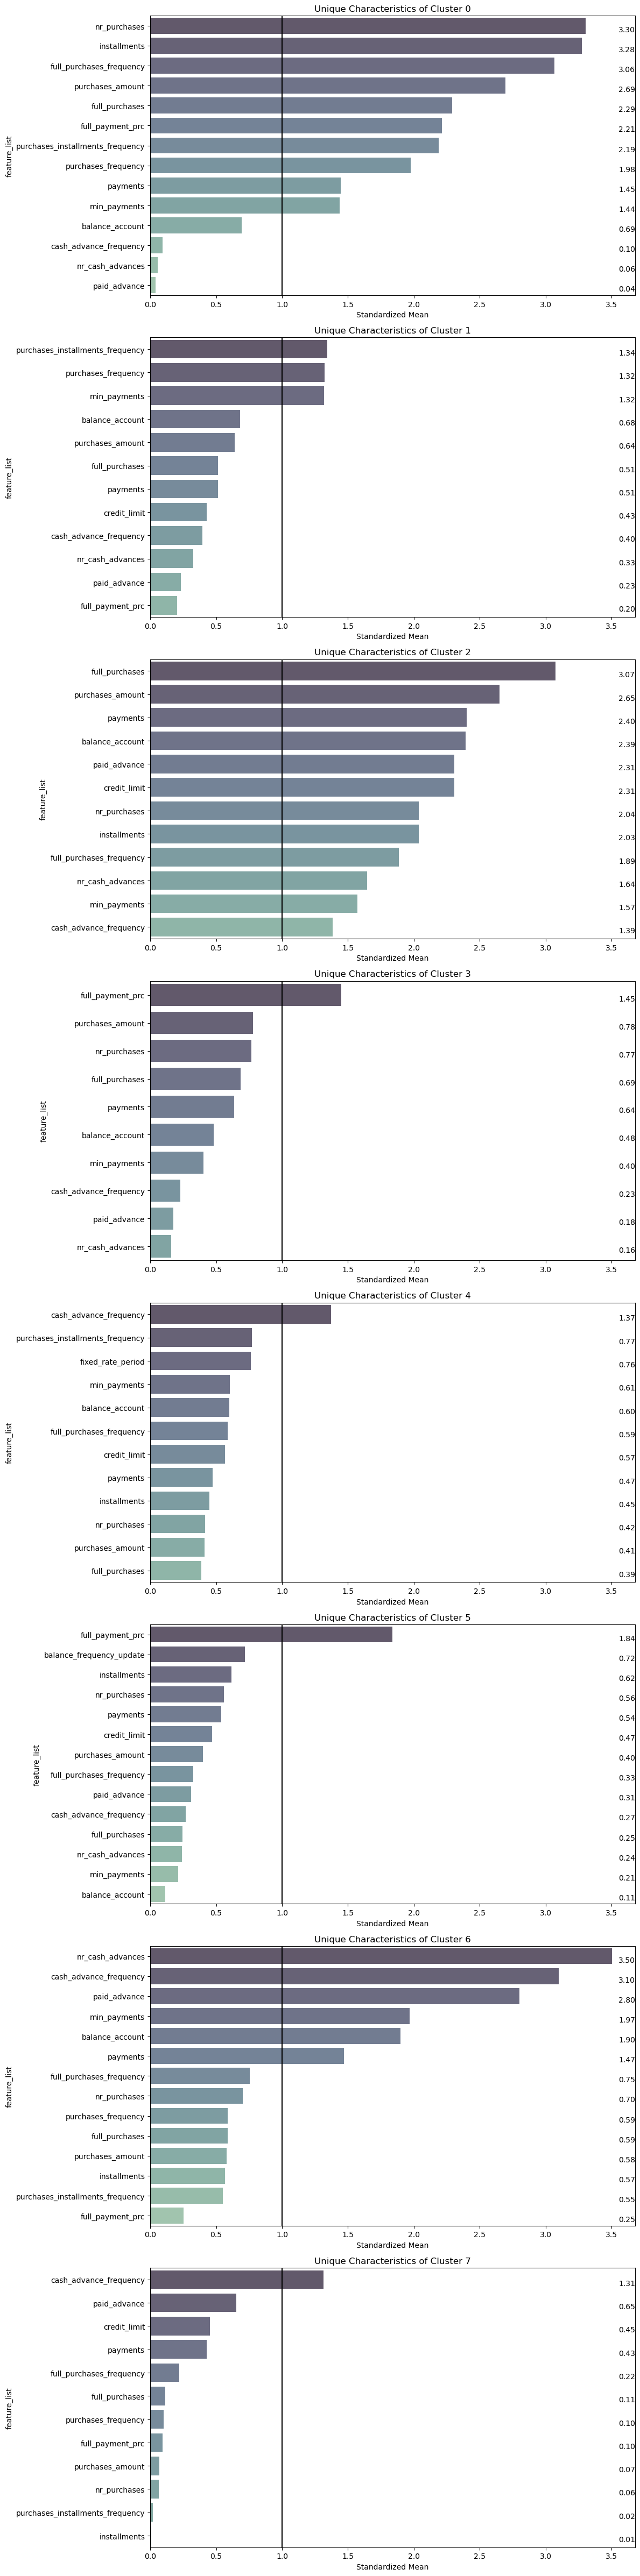

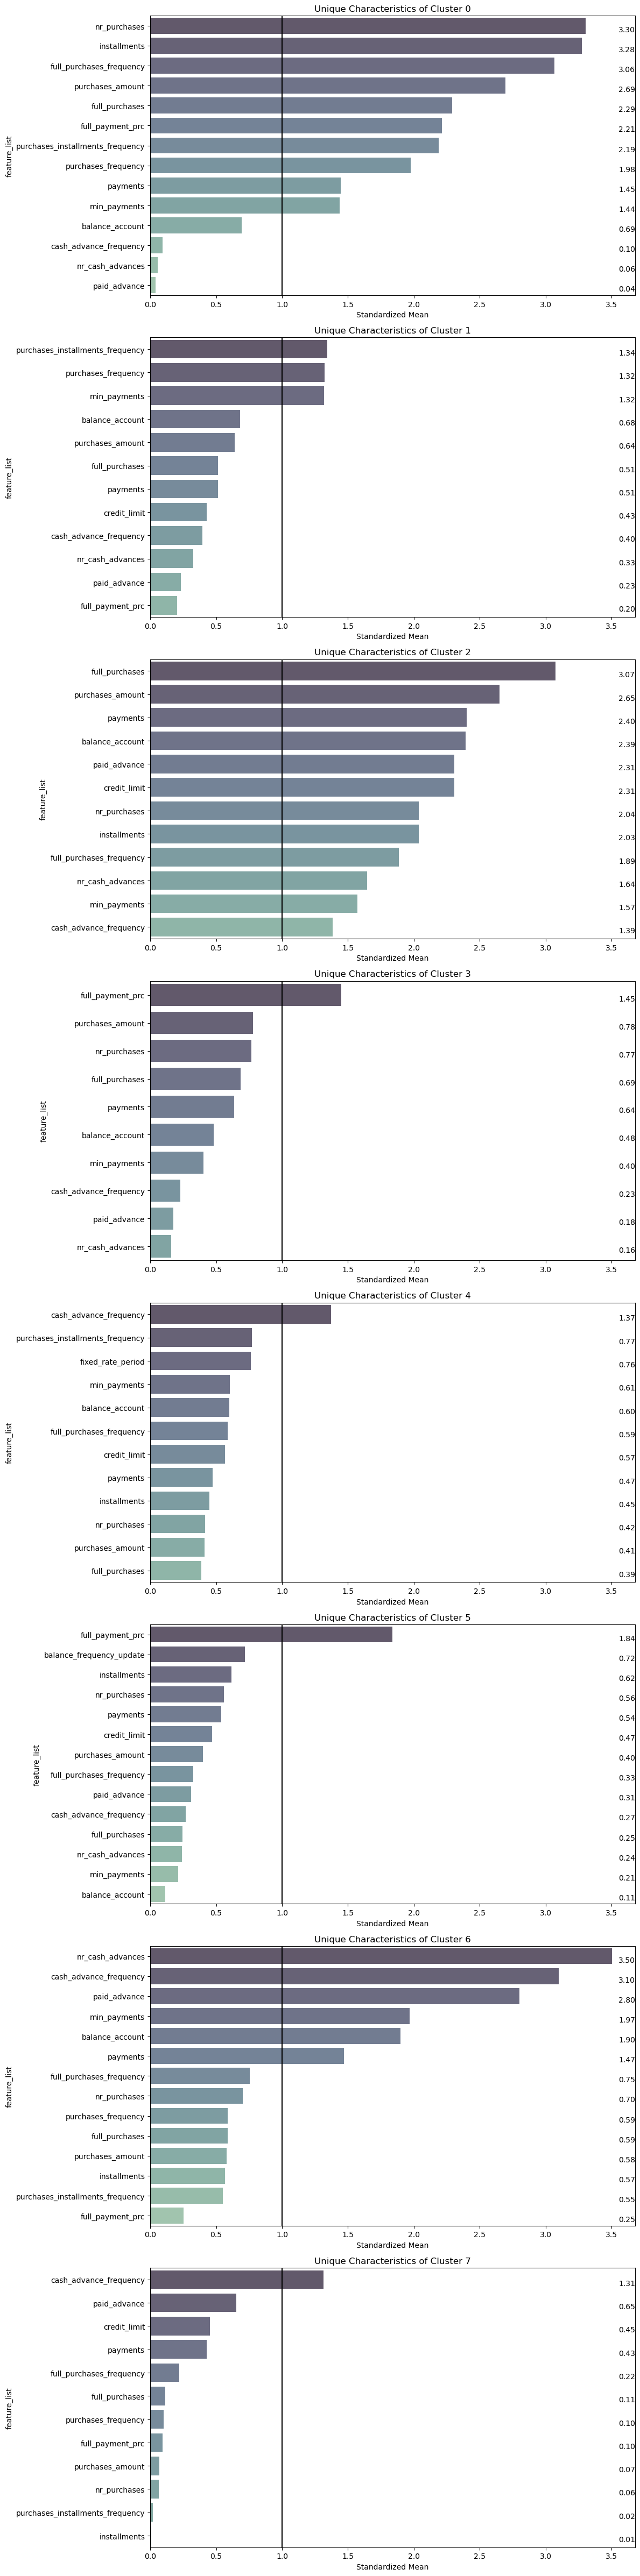

In [44]:
plot_features_all_cluster(df = df_plot_cluster, label_col ='PowTrUMAT', n_clusters = 8, sensitivity = 0.2)

In [45]:
#Function to save the plots individually
def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    for i in range(n_plot):
        fig, ax = plt.subplots(figsize=(12, 6), sharex='col')
        plot_barchart_all_unique_features(df=df, label_col=label_col, label=i, ax=ax, sensitivity=sensitivity)
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.set_title('Unique Characteristics of Cluster ' + str(i))
        ax.set_xlabel('Standardized Mean')
        ax.axvline(x=1, color='k')
        fig.savefig(f"plot_{i+1}.png")  # save each plot to a separate file
        plt.close(fig)

In [46]:
plot_features_all_cluster(df_plot_cluster,label_col ='PowTrUMAT', n_clusters = 8, sensitivity = 0.2)